In [1]:
import numpy as np
from sklearn import datasets
from sklearn.semi_supervised import LabelSpreading

In [2]:
# 모델과 데이터셋을 선언합니다. label spreading 에는 k=2 인 knn모델을 활용해보겠습니다. 
label_prop_model = LabelSpreading(kernel='knn', n_neighbors=2) 
iris = datasets.load_iris()

In [3]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [4]:
# 레이블 
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
# 레이블 중에서 unlabeled 시킬 30%의 데이터 포인트를 선정합니다. 
unlabeled_index = np.random.RandomState(0).rand(len(iris.target)) < 0.3
unlabeled_index

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True, False,
       False, False, False, False, False, False,  True, False,  True,
       False, False, False,  True, False, False, False,  True, False,
       False, False, False, False, False, False, False,  True, False,
       False,  True,  True, False, False, False, False, False,  True,
        True,  True, False,  True, False,  True,  True,  True, False,
        True,  True, False, False,  True, False,  True, False, False,
       False, False, False,  True,  True,  True,  True,  True, False,
       False,  True, False, False,  True, False,  True, False, False,
       False, False,  True, False,  True,  True, False,  True, False,
        True, False,  True, False, False,  True, False, False, False,
        True, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False,

In [6]:
# unlabeled point 의 레이블은 -1로 설정합니다 
unlabeled_target = np.copy(iris.target)
unlabeled_target[unlabeled_index] = -1

In [7]:
# 잘 unlabeled 되었음을 확인하실 수 있습니다. 
unlabeled_target

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1,
        0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0, -1,  0,  0,  0,
       -1,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0, -1, -1,  0,  0,  1,
        1,  1, -1, -1, -1,  1, -1,  1, -1, -1, -1,  1, -1, -1,  1,  1, -1,
        1, -1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1,  1,  1, -1,  1,  1,
       -1,  1, -1,  1,  1,  1,  1, -1,  1, -1, -1,  1, -1,  1, -1,  2, -1,
        2,  2, -1,  2,  2,  2, -1,  2,  2,  2,  2, -1,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2, -1,  2,  2, -1,  2,  2, -1, -1,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2, -1,  2,  2,  2])

In [8]:
# 예측 레이블 
label_prop_model.predict(iris.data)

NotFittedError: This LabelSpreading instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [9]:
# 실제 레이블 
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [10]:
import sklearn; sklearn.show_versions()


System:
    python: 3.11.4 (tags/v3.11.4:d2340ef, Jun  7 2023, 05:45:37) [MSC v.1934 64 bit (AMD64)]
executable: C:\Users\008yo\AppData\Local\Programs\Python\Python311\python.exe
   machine: Windows-10-10.0.19045-SP0

Python dependencies:
      sklearn: 1.3.0
          pip: 23.2.1
   setuptools: 65.5.0
        numpy: 1.24.3
        scipy: 1.11.2
       Cython: None
       pandas: 2.0.3
   matplotlib: 3.7.2
       joblib: 1.3.2
threadpoolctl: 3.2.0

Built with OpenMP: True

threadpoolctl info:
       user_api: blas
   internal_api: openblas
    num_threads: 16
         prefix: libopenblas
       filepath: C:\Users\008yo\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
        version: 0.3.21
threading_layer: pthreads
   architecture: Zen

       user_api: openmp
   internal_api: openmp
    num_threads: 16
         prefix: vcomp
       filepath: C:\Users\008yo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\.li

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.semi_supervised import LabelSpreading

iris = datasets.load_iris()

X = iris.data[:, :2]
y = iris.target
y_rand = np.random.RandomState(0).rand(y.shape[0])

# 레이블 중에서 unlabeled 시킬 데이터 포인트를 선정합니다. 
y_20 = np.copy(y)
y_20[y_rand < 0.2] = -1
y_50 = np.copy(y)
y_50[y_rand < 0.5] = -1
y_70 = np.copy(y)
y_70[y_rand < 0.7] = -1

n = 4
ls20 = (LabelSpreading(kernel='knn', n_neighbors=n).fit(X, y_20), y_20, '80% labeled data ')
ls50 = (LabelSpreading(kernel='knn', n_neighbors=n).fit(X, y_50), y_50, '50% labeled data ')
ls70 = (LabelSpreading(kernel='knn', n_neighbors=n).fit(X, y_70), y_70, '30% labeled data ')

C:\Users\008yo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\semi_supervised\_label_propagation.py:230: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer
C:\Users\008yo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\semi_supervised\_label_propagation.py:230: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer


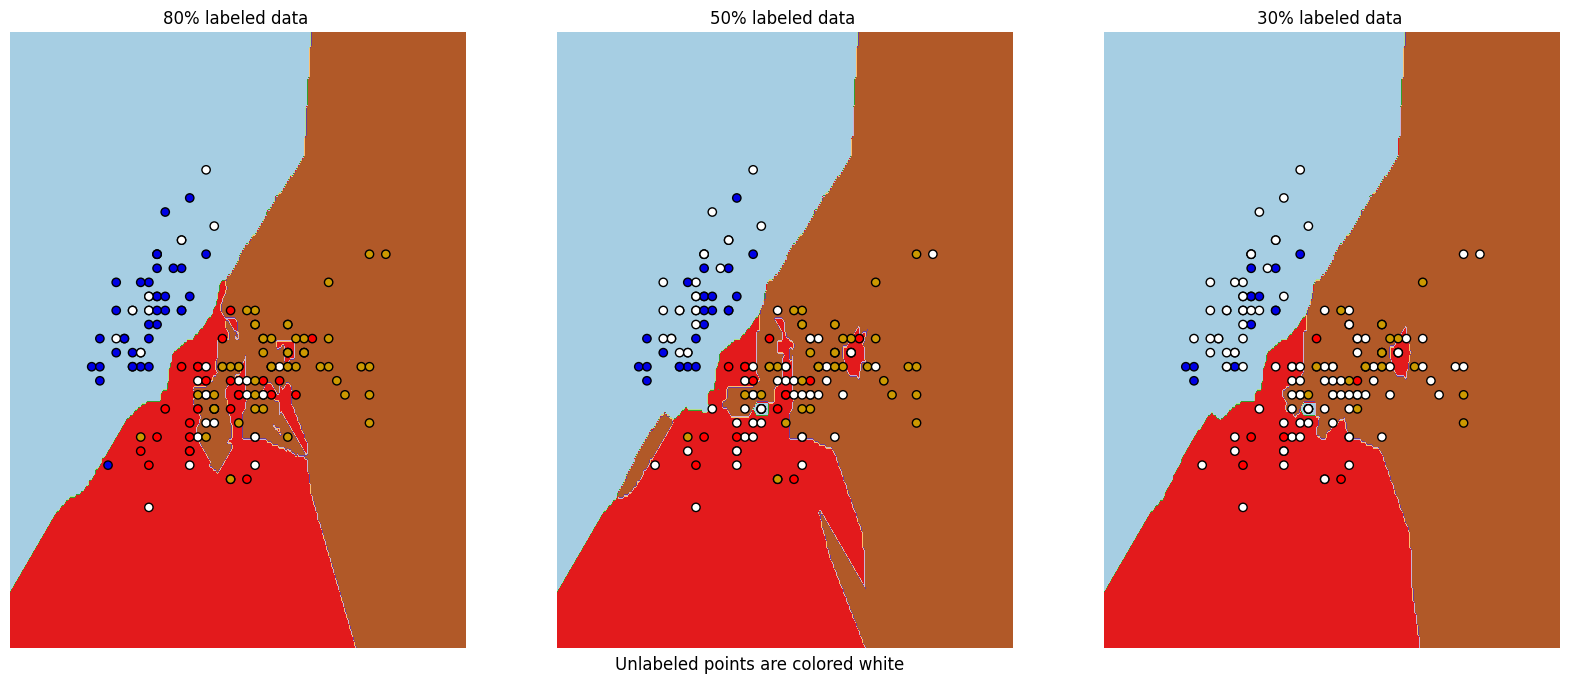

In [12]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

h = 0.02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


color_map = {-1: (1, 1, 1), 0: (0, 0, .9), 1: (1, 0, 0), 2: (.8, .6, 0)}
plt.figure(figsize=(20,8))

classifiers = (ls20,  ls50, ls70)
for i, (clf, y_train, title) in enumerate(classifiers):
    
    plt.subplot(1,3, i+1)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    
    # 예측 결과를 그래프 상에 표현합니다. 
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    plt.axis('off')


    # 학습 포인트들도 그래프에 표현합니다. 
    colors = [color_map[y] for y in y_train]
    plt.scatter(X[:, 0], X[:, 1], c=colors, edgecolors='black')

    plt.title(title)

plt.suptitle("Unlabeled points are colored white", y=0.1)
plt.show()